In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

"""
Synthèse des indicateurs de suivi de l’épidémie COVID-19
URL : https://www.data.gouv.fr/fr/datasets/synthese-des-indicateurs-de-suivi-de-lepidemie-covid-19/

Fichier choisi : 
table-indicateurs-open-data-france-2021-07-27-19h05.csv

Raison du choix du fichier : 
Ce jeu de données comprend l'essentiel des indicateurs de synthèse permettant le suivi de l'épidémie de COVID-19 sur
l'ensemble du territoire Français.

L'autre fichier disponible à l'URL donné correspond au même dataset mais détaillé par région et par département.
Comme notre objectif est de prédire l' évolution du nombre de cas positifs à l'échelle de la France entière,
ce deuxième dataset est un peu moins adapté.
"""

# Import du fichier depuis le google drive
url = 'https://drive.google.com/file/d/1wKdfLIhg4ZvFQmxXOzJMjsB2Ci0aKFQ4/view'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_initial = pd.read_csv(path)


In [2]:
'''
Description des données

Données contextuelles :
    
'date' = Date

Données relatives à la situation hospitalière :
    
'hosp'= Nombre de patients actuellement hospitalisés pour COVID-19.
'incid_hosp'= Nombre de nouveaux patients hospitalisés au cours des dernières 24h.
'rea'= Nombre de patients actuellement en réanimation ou en soins intensifs.
'incid_rea'= Nombre de nouveaux patients admis en réanimation au cours des dernières 24h.
'rad'= Nombre cumulé de patients ayant été hospitalisés pour COVID-19 et de retour à domicile en raison de l'amélioration de leur état de santé.
'incid_rad'= Nouveaux retours à domicile au cours des dernières 24h.

Données relatives au décès pour cause de COVID-19 :
    
'dchosp'= Décès à l’hôpital
'incid_dchosp'= Nouveaux patients décédés à l’hôpital au cours des dernières 24h.
'esms_dc'= Décès en EHPAD et ESMS
'dc_tot'= Cumul des décès (cumul des décès constatés à l'hôpital et en EPHAD et EMS)

Données relatives aux tests :
    
'conf'= Nombre de cas confirmés
'conf_j1'= Nombre de nouveaux cas confirmés (J-1 date de résultats)
'pos'= Nombre de personnes déclarées positives (J-3 date de prélèvement)
'pos_7j' = Nombre de personnes déclarées positives sur une semaine (J-3 date de prélèvement)
'esms_cas' = Cas confirmés en ESMS

Données relatives aux indicateurs de suivi de l’épidémie de COVID-19 :
'tx_pos'= Taux de positivité des tests virologiques (Le taux de positivité correspond au nombre de personnes testées positives (RT-PCR et test antigénique) pour la première fois depuis plus de 60 jours rapporté au nombre total de personnes testées positives ou négatives sur une période donnée ; et qui n‘ont jamais été testées positive dans les 60 jours précédents.)

'tx_incid'= Taux d'incidence (activité épidémique : Le taux d'incidence correspond au nombre de personnes testées positives (RT-PCR et test antigénique) pour la première fois depuis plus de 60 jours rapporté à la taille de la population. Il est exprimé pour 100 000 habitants)

'TO'= Taux d'occupation : tension hospitalière sur la capacité en réanimation (Proportion de patients atteints de COVID-19 actuellement en réanimation, en soins intensifs, ou en unité de surveillance continue rapportée au total des lits en capacité initiale, c’est-à-dire avant d’augmenter les capacités de lits de réanimation dans un hôpital).

'R'= Facteur de reproduction du virus (évolution du R0 : Le nombre de reproduction du virus : c’est le nombre moyen de personnes qu’une personne infectée peut contaminer. Si le R effectif est supérieur à 1, l’épidémie se développe ; s’il est inférieur à 1, l’épidémie régresse)
'''

df_initial.head(10)


,date,tx_pos,tx_incid,TO,R,rea,hosp,rad,dchosp,incid_rea,...,incid_rad,incid_dchosp,conf,conf_j1,pos,esms_dc,dc_tot,pos_7j,cv_dose1,esms_cas
0,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          552 non-null    object 
 1   tx_pos        432 non-null    float64
 2   tx_incid      432 non-null    float64
 3   TO            497 non-null    float64
 4   R             419 non-null    float64
 5   rea           497 non-null    float64
 6   hosp          497 non-null    float64
 7   rad           497 non-null    float64
 8   dchosp        497 non-null    float64
 9   incid_rea     496 non-null    float64
 10  incid_hosp    496 non-null    float64
 11  incid_rad     496 non-null    float64
 12  incid_dchosp  496 non-null    float64
 13  conf          552 non-null    int64  
 14  conf_j1       258 non-null    float64
 15  pos           438 non-null    float64
 16  esms_dc       469 non-null    float64
 17  dc_tot        469 non-null    float64
 18  pos_7j        432 non-null    

In [4]:
df_initial.describe()

,tx_pos,tx_incid,TO,R,rea,hosp,rad,dchosp,incid_rea,incid_hosp,incid_rad,incid_dchosp,conf,conf_j1,pos,esms_dc,dc_tot,pos_7j,cv_dose1,esms_cas
count,432.000000,432.000000,497.000000,419.000000,497.000000,497.000000,497.000000,497.000000,496.000000,496.000000,496.000000,496.000000,5.520000e+02,258.000000,438.000000,469.000000,469.000000,432.000000,1.0,11.000000
mean,5.162615,139.119125,0.535094,1.068499,2706.142857,18247.480885,181378.334004,42058.794769,182.336694,1018.387097,806.770161,173.875000,2.131718e+06,17538.131783,13297.436073,17154.582090,60096.368870,93369.793981,59.5,189134.363636
std,3.509824,118.196791,0.358561,0.287698,1814.154853,9574.808225,121131.153100,26811.826053,165.028181,883.191307,604.154137,150.172751,2.212509e+06,13044.291138,13785.129652,7393.134978,33514.634443,79327.770096,NaN,5507.700669
min,0.760632,4.721747,0.068011,0.530030,344.000000,2972.000000,816.000000,218.000000,1.000000,14.000000,5.000000,0.000000,0.000000e+00,487.000000,103.000000,1416.000000,6507.000000,3169.000000,59.5,179604.000000
25%,1.784519,27.559415,0.189205,0.869601,957.000000,7863.000000,79530.000000,19616.000000,34.750000,214.500000,272.750000,30.750000,1.544902e+05,6131.250000,1983.750000,10506.000000,30218.000000,18496.500000,59.5,185209.000000
50%,5.164861,123.388223,0.529458,1.039548,2678.000000,20750.000000,151146.000000,33207.000000,140.500000,768.500000,668.000000,140.000000,1.112502e+06,16414.000000,9762.000000,15287.000000,49208.000000,82812.000000,59.5,189464.000000
75%,6.760336,195.718930,0.789245,1.235183,3992.000000,26357.000000,286607.000000,67973.000000,279.000000,1623.250000,1304.000000,300.000000,3.996638e+06,24086.000000,20725.500000,25999.000000,94596.000000,131356.750000,59.5,193625.500000
max,15.883891,501.461708,1.387703,2.136070,7019.000000,33466.000000,389996.000000,85182.000000,771.000000,4281.000000,2388.000000,613.000000,6.026115e+06,84999.000000,70100.000000,26505.000000,111587.000000,336556.000000,59.5,195847.000000


In [5]:
#Conversion de la colonne date au format datetime

df_en_cours_de_traitement = df_initial
df_en_cours_de_traitement['date'] = pd.to_datetime(df_en_cours_de_traitement['date'])

In [6]:
"""
On peut constater que mis à part la colonne "conf" (le nombre de cas confirmés) toutes colonnes sont vides au début du fichier
Il faut attendre le 18/03/2020 pour avoir des données dans d'autres colonnes
Il faut attendre encore 2 mois de plus, le 19/05/2020, pour que tx_incid ai une valeur et que la quasi totalité des variables
soient remplies. 
tx_incid étant à priori une variable explicative clé, on vas faire débuté notre dataset à partir de cette date.
"""

# suppression des lignes avant le 19/05/2020
df_en_cours_de_traitement = df_en_cours_de_traitement[~(df_en_cours_de_traitement['date'] < '2020-05-19')]


In [7]:
"""
On rajoutes des colonnes pour représenter la saison (simplifié en été ou hiver) et les périodes de confinement
Un encodage one-hot est ensuite appliqué sur ces colonnes.
"""
values=["été","hiver","été"]
df_en_cours_de_traitement['saison']=pd.cut(df_en_cours_de_traitement['date'],[datetime.fromisoformat("2020-03-17"),datetime.fromisoformat("2020-10-01"),
                             datetime.fromisoformat('2021-04-01'),datetime.fromisoformat("2021-06-29")] 
                 , labels=pd.Categorical(values))

val_2=["oui","non","oui","non","oui","non"]
df_en_cours_de_traitement['confinement']=pd.cut(df_en_cours_de_traitement['date'], 
                         [datetime.fromisoformat("2020-03-17"),datetime.fromisoformat("2020-05-11"),datetime.fromisoformat("2020-10-30"),datetime.fromisoformat("2020-12-15"),
                          datetime.fromisoformat("2021-04-01"),datetime.fromisoformat("2021-04-30"),datetime.fromisoformat("2021-06-29")],
                         labels=pd.Categorical(val_2))

df_traitement_plus_col=pd.get_dummies(data=df_en_cours_de_traitement,columns=['saison','confinement'])

df_traitement_plus_col.head(10)

<ipython-input-7-641b8c89a363>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en_cours_de_traitement['saison']=pd.cut(df_en_cours_de_traitement['date'],[datetime.fromisoformat("2020-03-17"),datetime.fromisoformat("2020-10-01"),
<ipython-input-7-641b8c89a363>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en_cours_de_traitement['confinement']=pd.cut(df_en_cours_de_traitement['date'],


,date,tx_pos,tx_incid,TO,R,rea,hosp,rad,dchosp,incid_rea,...,pos,esms_dc,dc_tot,pos_7j,cv_dose1,esms_cas,saison_hiver,saison_été,confinement_non,confinement_oui
117,2020-05-19,2.169332,8.297699,0.366548,NaN,1854.0,18409.0,62554.0,17695.0,69.0,...,1055.0,10308.0,28003.0,5569.0,NaN,NaN,0,1,1,0
118,2020-05-20,2.119328,8.531625,0.346777,NaN,1754.0,17882.0,63345.0,17793.0,43.0,...,1058.0,10320.0,28113.0,5726.0,NaN,NaN,0,1,1,0
119,2020-05-21,2.066582,7.306862,0.337683,NaN,1708.0,17527.0,63849.0,17851.0,28.0,...,193.0,10345.0,28196.0,4904.0,NaN,NaN,0,1,1,0
120,2020-05-22,1.953322,6.982046,0.328984,NaN,1664.0,17327.0,64200.0,17925.0,36.0,...,826.0,10345.0,28270.0,4686.0,NaN,NaN,0,1,1,0
121,2020-05-23,1.923021,6.943307,0.321866,NaN,1628.0,17122.0,64538.0,17968.0,30.0,...,266.0,10345.0,28313.0,4660.0,NaN,NaN,0,1,1,0
122,2020-05-24,1.920123,6.947777,0.319889,NaN,1618.0,17129.0,64608.0,18003.0,24.0,...,145.0,10345.0,28348.0,4663.0,NaN,NaN,0,1,1,0
123,2020-05-25,1.751466,6.333905,0.310795,NaN,1572.0,16742.0,65190.0,18093.0,45.0,...,708.0,10320.0,28413.0,4251.0,NaN,NaN,0,1,1,0
124,2020-05-26,1.629377,5.913731,0.300316,NaN,1519.0,16209.0,65870.0,18175.0,37.0,...,773.0,10335.0,28510.0,3969.0,NaN,NaN,0,1,1,0
125,2020-05-27,1.537162,5.423527,0.290036,NaN,1467.0,15627.0,66575.0,18240.0,32.0,...,729.0,10336.0,28576.0,3640.0,NaN,NaN,0,1,1,0
126,2020-05-28,1.507836,6.091038,0.275801,NaN,1395.0,15155.0,67182.0,18306.0,36.0,...,641.0,10336.0,28642.0,4088.0,NaN,NaN,0,1,1,0


In [8]:
"""
Import du fichier de données des vaccins depuis le google drive

Données relatives aux personnes vaccinées contre la Covid-19
URL : 
https://www.data.gouv.fr/fr/datasets/donnees-relatives-aux-personnes-vaccinees-contre-la-covid-19-1/

Fichier choisi : 
vacsi12-fra.csv

Raison du choix du fichier : 
Ce jeu de données comprend l'essentiel des indicateurs concernant les vaccinations et permettant le suivi de l'épidémie de COVID-19 sur
l'ensemble du territoire Français.

fra = indique que l'échelle des données est la france entière. Valeur FR à chaque ligne.
jour = la date du jour.
n_dose1 = le  nombre de patients ayant reçu la première dose
n_complet = le  nombre de patients ayant reçu les deux dose et étant couvert complètement par le vaccin.
n_cum_dose1 = le  nombre cumulé de patients ayant reçu la première dose.
n_cum_complet = le  nombre cumulé de patients ayant reçu les deux dose et étant couvert complètement par le vaccin.
couv_dose1 = le pourcentage de la population ayant reçu la première dose.
couv_complet = le pourcentage de la population ayant reçu les deux dose et étant couvert complètement par le vaccin.

"""

# Import du fichier depuis le google drive
url = 'https://drive.google.com/file/d/1yPwjujIbo6KdQhHe_8onfWHTFCIoiz--/view'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_vaccins = pd.read_csv(path, sep=';')
df_vaccins.head()

,fra,jour,n_dose1,n_complet,n_cum_dose1,n_cum_complet,couv_dose1,couv_complet
0,FR,2020-12-27,53,4,53,4,0.0,0.0
1,FR,2020-12-28,120,0,173,4,0.0,0.0
2,FR,2020-12-29,121,0,294,4,0.0,0.0
3,FR,2020-12-30,147,0,441,4,0.0,0.0
4,FR,2020-12-31,101,0,542,4,0.0,0.0


In [9]:
# Vérification de la présence de valeurs manquantes dans le dataframe df_vaccins

print("Total des valeurs nulles de chaque colonnes :")
df_vaccins.isnull().sum()

Total des valeurs nulles de chaque colonnes :


fra              0
jour             0
n_dose1          0
n_complet        0
n_cum_dose1      0
n_cum_complet    0
couv_dose1       0
couv_complet     0
dtype: int64

In [10]:
"""
Besoin de changer le nom de la colonne jour en date puis la passer au format datetime
"""
# Changement du nom de la colonne 'jour' en 'date'
df_vaccins_en_cours_de_traitement = df_vaccins.rename(columns={'jour': 'date'}, index={'ONE': 'Row_1'})

# Conversion de la colonne date au format datetime
df_vaccins_en_cours_de_traitement['date'] = pd.to_datetime(df_vaccins_en_cours_de_traitement['date'])
df_vaccins_en_cours_de_traitement.head()


,fra,date,n_dose1,n_complet,n_cum_dose1,n_cum_complet,couv_dose1,couv_complet
0,FR,2020-12-27,53,4,53,4,0.0,0.0
1,FR,2020-12-28,120,0,173,4,0.0,0.0
2,FR,2020-12-29,121,0,294,4,0.0,0.0
3,FR,2020-12-30,147,0,441,4,0.0,0.0
4,FR,2020-12-31,101,0,542,4,0.0,0.0


In [11]:
# On vérifie le nombre d'entées dans le dataframe et qu'il n'y a pas de valeur nulle dans la colonne date

df_vaccins_en_cours_de_traitement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 210
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   fra            211 non-null    object        
 1   date           211 non-null    datetime64[ns]
 2   n_dose1        211 non-null    int64         
 3   n_complet      211 non-null    int64         
 4   n_cum_dose1    211 non-null    int64         
 5   n_cum_complet  211 non-null    int64         
 6   couv_dose1     211 non-null    float64       
 7   couv_complet   211 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 14.8+ KB


In [12]:
# On vérifie qu'il n'y a pas de duplication parmi les dates 
df_vaccins_en_cours_de_traitement.nunique()

fra                1
date             211
n_dose1          211
n_complet        205
n_cum_dose1      211
n_cum_complet    205
couv_dose1       186
couv_complet     155
dtype: int64

In [13]:
"""
Fusion des deux dataframes sur la 'date'
"""

df_traitement_merge = pd.merge(df_traitement_plus_col, df_vaccins_en_cours_de_traitement, how='outer', on='date')

In [14]:
df_traitement_merge.head()

,date,tx_pos,tx_incid,TO,R,rea,hosp,rad,dchosp,incid_rea,...,saison_été,confinement_non,confinement_oui,fra,n_dose1,n_complet,n_cum_dose1,n_cum_complet,couv_dose1,couv_complet
0,2020-05-19,2.169332,8.297699,0.366548,NaN,1854.0,18409.0,62554.0,17695.0,69.0,...,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-05-20,2.119328,8.531625,0.346777,NaN,1754.0,17882.0,63345.0,17793.0,43.0,...,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-05-21,2.066582,7.306862,0.337683,NaN,1708.0,17527.0,63849.0,17851.0,28.0,...,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-05-22,1.953322,6.982046,0.328984,NaN,1664.0,17327.0,64200.0,17925.0,36.0,...,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-05-23,1.923021,6.943307,0.321866,NaN,1628.0,17122.0,64538.0,17968.0,30.0,...,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
"""
Le fichier des vaccination ne contenait aucunes valleurs nulles mais débute le 27/12/2020.
Or nous avons fait débuter notre dataset df_traitement_plus_col le 19/05/2020.
La fusion des deux jeux de données à l'étape précédente a donc ajouté des valeurs nulles entre le 19/05/2020 et le 27/12/2020
dans les colonnes 'fra', 'n_dose1', 'n_complet', 'n_cum_dose1', 'n_cum_complet', 'couv_dose1', 'couv_complet'.
La colonne 'fra' sera supprimée à l'étape suivante et ne nécéssite donc pas de traitement.

Pour rappel les autres colonnes correspondent à :
n_dose1 = le  nombre de patients ayant reçu la première dose
n_complet = le  nombre de patients ayant reçu les deux dose et étant couvert complètement par le vaccin.
n_cum_dose1 = le  nombre cumulé de patients ayant reçu la première dose.
n_cum_complet = le  nombre cumulé de patients ayant reçu les deux dose et étant couvert complètement par le vaccin.
couv_dose1 = le pourcentage de la population ayant reçu la première dose.
couv_complet = le pourcentage de la population ayant reçu les deux dose et étant couvert complètement par le vaccin.

Il est donc logique de remplacer l'ensemble des NaN de ces six colonnes par la valeur zéro.
"""

# Remplacement des NaN crées par le merge sur les données du fichier de vaccinations
df_traitement_merge.fillna({'n_dose1': 0, 'n_complet': 0, 'n_cum_dose1': 0, 'n_cum_complet': 0, 'couv_dose1': 0, 'couv_complet': 0}, inplace=True)

df_traitement_merge.head()


,date,tx_pos,tx_incid,TO,R,rea,hosp,rad,dchosp,incid_rea,...,saison_été,confinement_non,confinement_oui,fra,n_dose1,n_complet,n_cum_dose1,n_cum_complet,couv_dose1,couv_complet
0,2020-05-19,2.169332,8.297699,0.366548,NaN,1854.0,18409.0,62554.0,17695.0,69.0,...,1,1,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-05-20,2.119328,8.531625,0.346777,NaN,1754.0,17882.0,63345.0,17793.0,43.0,...,1,1,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-05-21,2.066582,7.306862,0.337683,NaN,1708.0,17527.0,63849.0,17851.0,28.0,...,1,1,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-05-22,1.953322,6.982046,0.328984,NaN,1664.0,17327.0,64200.0,17925.0,36.0,...,1,1,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-05-23,1.923021,6.943307,0.321866,NaN,1628.0,17122.0,64538.0,17968.0,30.0,...,1,1,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
"""
Les colonnes cv_dose1 et esms_cas sont pratiquement vides avec respectivement 1 et 11 valeurs non null et sont donc supprimées.
La colonne fra ne contenant qu'une seule valeur (FR) et les NaN crées par le merge elle peut être supprimée également.
"""

df_traitement_merge.drop(columns=['cv_dose1', 'esms_cas', 'fra'], inplace=True)

In [17]:
conf_j1_NaN = df_traitement_merge['conf_j1'].isnull().sum()
longueur_Df = len(df_traitement_merge)
conf_j1_Pourcentage_NaN = round((conf_j1_NaN/longueur_Df)*100.0, 2)
print ('Somme des valeurs nulles dans la colonne conf_j1 : ', conf_j1_NaN)
print("Longueur de notre dataframe après modifications : ", longueur_Df)
print("Pourcentage de valeurs manquantes dans la colonne conf_j1 : ", conf_j1_Pourcentage_NaN)


Somme des valeurs nulles dans la colonne conf_j1 :  177
Longueur de notre dataframe après modifications :  435
Pourcentage de valeurs manquantes dans la colonne conf_j1 :  40.69


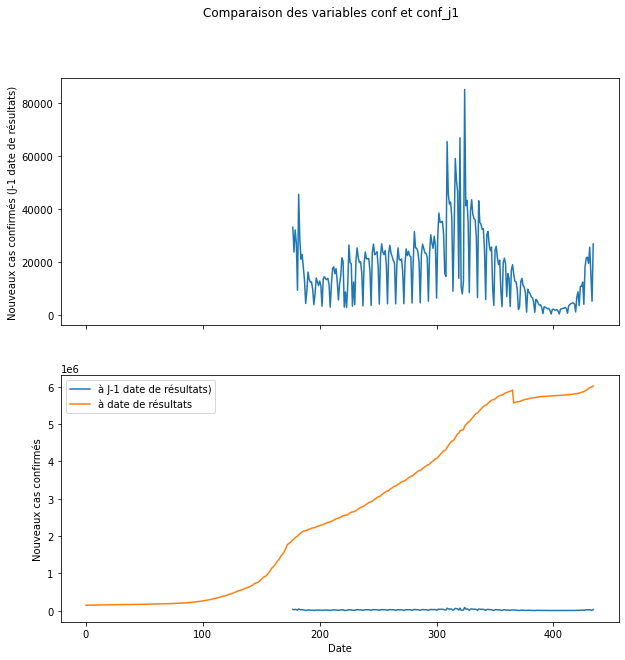

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(10,10))
ax1.plot(df_traitement_merge.conf_j1)
ax2.plot(df_traitement_merge.conf_j1, label = "à J-1 date de résultats)")
ax2.plot(df_traitement_merge.conf, label = "à date de résultats")
ax1.set(ylabel="Nouveaux cas confirmés (J-1 date de résultats)")
ax2.set(xlabel="Date", ylabel="Nouveaux cas confirmés")
ax2.legend()
fig.suptitle('Comparaison des variables conf et conf_j1')
plt.show()



In [19]:
"""
Pour rappel la colonne 'conf_j1'correspond au nombre de nouveaux cas confirmés (J-1 date de résultats)

Comme on peut le constater dans les cellules précédentes, la colonne conf_j1 a :
    - 40% de valeurs manquantes
    - Toutes les valeurs manquantes se situent au début de l'épidémie (entre le 19/05/2020 et le 11/11/2020)
    - Les valeurs ne présentent pas une forme caractéristique d'une loi de probabilité spécifique

Il serait donc compliqué de remplacer ses valeurs manquantes sans introduire un fort bias dans les données.
Il est donc plus judicieux de supprimer la colonne 'conf_j1'.
""" 

df_traitement_merge.drop(columns=['conf_j1'], inplace=True)


In [20]:
print("Total des valeurs nulles de chaque colonnes :")
df_traitement_merge.isnull().sum()

Total des valeurs nulles de chaque colonnes :


date                0
tx_pos              3
tx_incid            3
TO                  0
R                  16
rea                 0
hosp                0
rad                 0
dchosp              0
incid_rea           0
incid_hosp          0
incid_rad           0
incid_dchosp        0
conf                0
pos                 3
esms_dc            12
dc_tot             12
pos_7j              3
saison_hiver        0
saison_été          0
confinement_non     0
confinement_oui     0
n_dose1             0
n_complet           0
n_cum_dose1         0
n_cum_complet       0
couv_dose1          0
couv_complet        0
dtype: int64

In [21]:
"""
Comme on peut le constater il reste encorequelques valeurs nulles dans le dataset.
Pour remplir ses valeurs manquantes on vas utiliser la fonction IterativeImputer de sklearn
"""

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

it_impute = IterativeImputer()

# IterativeImputer n'accepte que les valeurs numériques, on drop la colonne date temporairement
save_col_date = df_traitement_merge['date']
df_traitement_merge.drop(columns=['date'], inplace=True)

# Sauvegarde du nom des colonnes
liste_noms_col = list(df_traitement_merge.columns)

donnee_Covid_traitee_array = it_impute.fit_transform(df_traitement_merge)



In [22]:
print("Total des valeurs nulles dans donnee_Covid_traitee_array :")

np.count_nonzero(np.isnan(donnee_Covid_traitee_array))


Total des valeurs nulles dans donnee_Covid_traitee_array :


0

In [23]:
# Verification des données obtenues

df_donnee_Covid_fin_traitement = pd.DataFrame(donnee_Covid_traitee_array)

df_donnee_Covid_fin_traitement.head()


,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,2.169332,8.297699,0.366548,0.700667,1854.0,18409.0,62554.0,17695.0,69.0,506.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.119328,8.531625,0.346777,0.726507,1754.0,17882.0,63345.0,17793.0,43.0,432.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.066582,7.306862,0.337683,0.750053,1708.0,17527.0,63849.0,17851.0,28.0,271.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.953322,6.982046,0.328984,0.765234,1664.0,17327.0,64200.0,17925.0,36.0,263.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.923021,6.943307,0.321866,0.772277,1628.0,17122.0,64538.0,17968.0,30.0,233.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# On redonne au colonnes leur nom initial

df_donnee_Covid_traitee = df_donnee_Covid_fin_traitement
df_donnee_Covid_traitee.columns = liste_noms_col

df_donnee_Covid_traitee.head()


,tx_pos,tx_incid,TO,R,rea,hosp,rad,dchosp,incid_rea,incid_hosp,...,saison_hiver,saison_été,confinement_non,confinement_oui,n_dose1,n_complet,n_cum_dose1,n_cum_complet,couv_dose1,couv_complet
0,2.169332,8.297699,0.366548,0.700667,1854.0,18409.0,62554.0,17695.0,69.0,506.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.119328,8.531625,0.346777,0.726507,1754.0,17882.0,63345.0,17793.0,43.0,432.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.066582,7.306862,0.337683,0.750053,1708.0,17527.0,63849.0,17851.0,28.0,271.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.953322,6.982046,0.328984,0.765234,1664.0,17327.0,64200.0,17925.0,36.0,263.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.923021,6.943307,0.321866,0.772277,1628.0,17122.0,64538.0,17968.0,30.0,233.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# On rejoute la colonne date qui avais été retirée

df_donnee_Covid_traitee['date'] = save_col_date

df_donnee_Covid_traitee.head()

,tx_pos,tx_incid,TO,R,rea,hosp,rad,dchosp,incid_rea,incid_hosp,...,saison_été,confinement_non,confinement_oui,n_dose1,n_complet,n_cum_dose1,n_cum_complet,couv_dose1,couv_complet,date
0,2.169332,8.297699,0.366548,0.700667,1854.0,18409.0,62554.0,17695.0,69.0,506.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-19
1,2.119328,8.531625,0.346777,0.726507,1754.0,17882.0,63345.0,17793.0,43.0,432.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-20
2,2.066582,7.306862,0.337683,0.750053,1708.0,17527.0,63849.0,17851.0,28.0,271.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-21
3,1.953322,6.982046,0.328984,0.765234,1664.0,17327.0,64200.0,17925.0,36.0,263.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-22
4,1.923021,6.943307,0.321866,0.772277,1628.0,17122.0,64538.0,17968.0,30.0,233.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-05-23


In [26]:
#Indexation de la colonne date
df_donnee_Covid_traitee = df_donnee_Covid_traitee.set_index('date')
df_donnee_Covid_traitee.head()

,tx_pos,tx_incid,TO,R,rea,hosp,rad,dchosp,incid_rea,incid_hosp,...,saison_hiver,saison_été,confinement_non,confinement_oui,n_dose1,n_complet,n_cum_dose1,n_cum_complet,couv_dose1,couv_complet
date,,,,,,,,,,,,,,,,,,,,,
2020-05-19,2.169332,8.297699,0.366548,0.700667,1854.0,18409.0,62554.0,17695.0,69.0,506.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-20,2.119328,8.531625,0.346777,0.726507,1754.0,17882.0,63345.0,17793.0,43.0,432.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-21,2.066582,7.306862,0.337683,0.750053,1708.0,17527.0,63849.0,17851.0,28.0,271.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-22,1.953322,6.982046,0.328984,0.765234,1664.0,17327.0,64200.0,17925.0,36.0,263.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-23,1.923021,6.943307,0.321866,0.772277,1628.0,17122.0,64538.0,17968.0,30.0,233.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# export des données au format csv

df_donnee_Covid_traitee.to_csv("C:/Users/cedri/Downloads/NoteBook_ProjetsCovid/Donnee_Covid_Traitees.csv")

In [28]:
print("Les données ont été traitées")

Les données ont été traitées
